In [7]:
%pylab inline

font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = np.loadtxt('../input/synthetic_data.dat')

In [4]:
shape(data)

(10000, 2)

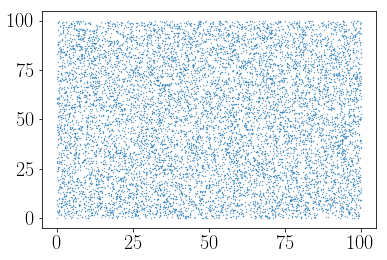

In [8]:
scatter(data[:,0], data[:,1], s=0.1)

In [30]:
nx = 1000
ny = 1000
nz = 1000
Dx = 10
Dy = 10
Dz = 10

X = np.random.random(nx)*Dx
Y = np.random.random(ny)*Dy
X = np.append(X, np.random.normal(loc= 0.80*Dx, scale = 1, size = 600))
Y = np.append(Y, np.random.normal(loc= 0.60*Dy, scale = 1, size = 600))
X = np.append(X, np.random.normal(loc= 0.20*Dx, scale = 1, size = 600))
Y = np.append(Y, np.random.normal(loc= 0.30*Dy, scale = 1, size = 600))


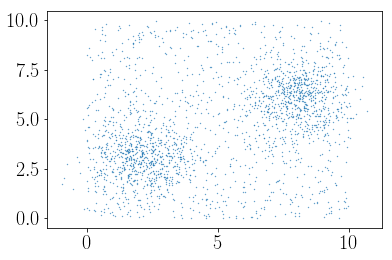

In [31]:
scatter(X, Y, s=0.1)
#xlim(0, 10)
#ylim(0, 10)

In [41]:
from sklearn.neighbors import NearestNeighbors

n_neighbors = 15

nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(data)
distances, indices = nbrs.kneighbors(data)

In [42]:
distances

array([[ 0.        ,  0.83265721,  1.15503651],
       [ 0.        ,  0.12715709,  0.50539238],
       [ 0.        ,  0.28431917,  0.99848639],
       ..., 
       [ 0.        ,  0.62776847,  0.94262814],
       [ 0.        ,  0.21938777,  0.66186225],
       [ 0.        ,  0.46704029,  0.4809406 ]])

In [32]:
def Neighbours_Cartesian(K, Res, xmin_limit, xmax_limit, ymin_limit, ymax_limit, zmin_limit, zmax_limit):
    """
    Function that computes the nearest neighboors! 
    """
	global d_k
	d_k = [] 
	if D == 1:
		X = data[:, N_X]
		Fx = np.linspace(xmin_limit, xmax_limit, Res)
		for i in Fx:
			d =  abs(X-i)
			d2 = sorted(d)
			d3 = d2[0:K]
			d_k.append(d3)
	elif D == 2:
		X = data[:, N_X]
		Y = data[:, N_Y]
    		Fx = np.linspace(xmin_limit, xmax_limit, Res)
    		Fy = np.linspace(ymin_limit, ymax_limit, Res)
		for i in Fx:
        		for j in Fy:
            			d = np.sqrt((X-i)**2 + (Y-j)**2)
            			d2 = sorted(d)
           			d3 = d2[0:K]
         			d_k.append(d3)
	elif D ==3:
		X = data[:, N_X]
		Y = data[:, N_Y]
		Z = data[:, N_Z]
    		Fx = np.linspace(xmin_limit, xmax_limit, Res)
    		Fy = np.linspace(ymin_limit, ymax_limit, Res)
		Fz = np.linspace(zmin_limit, zmax_limit, Res)
		for i in Fx:
			for j in Fy:
				for k3 in Fz:
					d = np.sqrt((X-i)**2 + (Y-j)**2	+ (Z-k3)**2)
					d2 = sorted(d)
					d3 = d2[0:K]
					d_k.append(d3)
	else:	
		print('No aveilable dimension')
    	print('Completed neighbours finder')
    #print d4[0:10]
    
Neighbours_Cartesian(K, Res, xmin_limit, xmax_limit, ymin_limit, ymax_limit, zmin_limit, zmax_limit)


def solution(K):
	k = range(1, 100)
	global d_0
    	d_0 = []
#	T = []
	#T2 = []
	if D == 1:
		for i in range(len(d_k)):
			T = []
			for j in range(K):
				teo = d_k[i][j]/k[j]
				T.append(teo)
			T2 = sum(T)
			d_0.append(K/(T2*T2*np.pi))
	elif D == 2:
    		for i in range(len(d_k)): #escala los puntos del espacio
        		T = []
			for j in range (K):# j escala los vecinos
            			teo = d_k[i][j]**2 / k[j] 
            			T.append(teo)
				#print type(T)
        		T2 = np.sqrt(sum(T)) 
        		d_0.append(K/(T2*T2*np.pi)) #This is divided in order to get n_0
	elif D ==3: 
		for i in range(len(d_k)):
			T=[]
			for j in range (K): 
				teo = d_k[i][j]**3/ k[j]
				T.append(teo)
			T2 = (sum(T))**(1/3)
			d_0.append(3.0*K/(4.0*np.pi*T2*T2*T2))
	else:
		print 'No available dimension'
	print 'Completed density estimation'
	
solution(K)

#Sigma Estimator

def sigma_estimator(K):
    k = range(1, 100)
    global sigma_2
    sigma_2 = []
    #NDots = linspace(0, D, Res)
    #ndots = len(NDots)*len(NDots)
    for i in range(len(d_k)): #i escala los puntos del espacio
        S = []
        for j in range (K):# j escala los vecinos 
            sigma1 = (-3*d_k[i][j]**2 + k[j]*d_0[i]**2)
            S.append(sigma1)
        S2 = ((sum(S))) 
        sigma = (-K*d_0[i]**4)/(2*S2)
        sigma_2.append(np.pi*sigma**2) 
    #p  rint type(sigma), dtype(S[1]), type(S), dtype(S2), type(sigma_2)
    print 'Completed Sigma estimation'
    print 'Writting data in (../output/)'
sigma_estimator(K)


# Writting Data to make plots

def plots(Res, xmin_limit, xmax_limit, ymin_limit, ymax_limit, zmin_limit, zmax_limit):
        f = open(str(data_output), 'w')
	
	x = []
        y = []
        z = []

	if D == 1:
		X = data[:, N_X]
		f.write("# x  d_0   sigma " + "\n")
       	        Fx = np.linspace(xmin_limit , xmax_limit  , Res)
		for i in Fx:
			x.append(i)
		for i in range(len(x)):
			 f.write(str(Fx[i]) +  "  " + str(d_0[i]) + "  " + str(sigma_2[i])+"\n")
		f.close()
		
	elif D ==2:
		X = data[:, N_Y]
		Y = data[:, N_Y]
		f.write("# x    y    d_0      sigma"+ "\n") 
		Fx = np.linspace(xmin_limit , xmax_limit  , Res)
	        Fy = np.linspace(ymin_limit , ymax_limit  , Res)
 		for i in Fx:
                	for j in Fy:
                        	x.append(i)
                       		y.append(j)
	        for i in range(len(x)):
        	        f.write(str(x[i]) + "  " + str(y[i]) + "  " + str(d_0[i]) + "  " + str(sigma_2[i])+"\n")
        	f.close()

        elif D ==3:
		X = data[:, N_X]
		Y = data[:, N_Z]
		Z = data[:, N_Z]
		f.write("#x     y      z      d_0       sigma" + "\n")
   	        Fx = np.linspace(xmin_limit , xmax_limit , Res)
                Fy = np.linspace(ymin_limit , ymax_limit , Res)
		Fz = np.linspace(zmin_limit , zmax_limit , Res)
		for i in Fx:
			for j in Fy:
				for k3 in Fz:
					x.append(i)
					y.append(j)
					z.append(k3)
		for i in range(len(x)):
			f.write(str(x[i]) + "   " + str(y[i]) + "   " + str(z[i]) + "   " + str(d_0[i])  + "\n")   
		f.close()	
	
   	#FRx = linspace(amin(R*cos(theta)) - 5, amax(R*cos(theta)) + 5 , Res)
#FRy = linspace(amin(R*sin(theta)) - 5, amax(R*sin(theta)) + 5 , Res)

TabError: inconsistent use of tabs and spaces in indentation (<ipython-input-32-cd28b32a46d7>, line 15)